# UFPB - CI
## Aprendizado de Máquina
### Heriberto Márcio da Silva Júnior - 20180027518

## Perceptron Learning Algorithm (PLA) 

### Apresentação

    O presente trabalho tem como objetivo implementar e testar um perceptron em um conjunto de dados no R².
    
   ### Preparação dos dados
    A fim de atingir este objetivo, foi criando um conjunto de dados com 1000 amostras com valores randômicos X e Y pertencentes ao intervalo [-1,1]. Em seguida foi criado uma equação da reta (reta hipótese) que classifica a amostra em dois grupos azul (abaixo da reta) e verde (acima da reta).
   ### Divisão entre amostra e teste
    A fim de estudar o perceptron foram gerados dois grupos de treinamento/teste: um com amostra de treinamento com tamanho = 10 e outro com tamanho = 100. Uma vez que o perceptron tenha sido treinado, foi gerado um gráfico a fim de visualizar a semelhança entre a reta hipótese e a reta gerada pelo perceptron e apresentado a porcentagem de eficácia do algoritmo.
   ### Conclusão
    Em diversos testes com o algoritmo foi possível avaliar o viés criado pela falta de dados no treinamento


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from random import uniform, randint, random

## Funções auxiliares

In [2]:
def gerar_reta(lista_x, y0, y1):
    # considerando X0 = -1 e x1 = 1   
    x = np.array(lista_x)       
    #y =  mx + b
    m =  (y1 - y0)/(1 - (-1))
    b =  y0 - (-1) * m

    reta = m * x  + b
    
    return reta

def classificar_amostra(amostra, reta):
    #amostra no formato [[lista_x],[lista_y]]
    lista_positivo_x = []
    lista_positivo_y = []
    lista_negativo_x = []
    lista_negativo_y = []
    lista_geral = []
    
    for i in range(len(amostra[1])):
        x = amostra[0]
        y = amostra[1]       
        
        if y[i] >= reta[i]:
            lista_positivo_x.append(x[i])
            lista_positivo_y.append(y[i])            
            lista_geral.append(1)
        else:            
            lista_negativo_x.append(x[i])
            lista_negativo_y.append(y[i])
            lista_geral.append(-1)            
        
        
    lista_positivo = [lista_positivo_x, lista_positivo_y]
    lista_negativo = [lista_negativo_x, lista_negativo_y]
    
    return lista_positivo, lista_negativo, lista_geral

def selecionarAmostra(n_amostra, populacao):    
    #poulação no formato [[lista_x], [lista_y]]
    amostra_x = []
    amostra_y = []
    teste_x = []
    teste_y = []
    indices_sorteados = []
    i = 0   
    
    # Sorteia indices para seleção da amostra
    while i < n_amostra:
        #sorteia um indice aleatório para ser adiconado na amostra
        indice = randint(0,len(populacao[0]))        
        #verifica se o índice já não foi sorteado evitando duplicidade
        if indice not in indices_sorteados:
            indices_sorteados.append(indice)                        
            i+= 1
    
    #ordena os indices evitando que os pontos X saiam da ordem crescente
    indices_sorteados.sort()

    # cria lista com amostra
    for i in indices_sorteados:
        amostra_x.append(populacao[0][i])
        amostra_y.append(populacao[1][i])        
    
    # Cria lista de teste
    for i in range(len(populacao[0])):
        if i not in indices_sorteados:
            teste_x.append(populacao[0][i])    
            teste_y.append(populacao[1][i])    
            
    amostra = [amostra_x, amostra_y]
    teste   = [teste_x, teste_y]
    
    return amostra, teste

def preparar_amostra_treino(amostra):
    #amostra no formato [[lista_x], [lista_y]]
    #nova_amostra no formato [1, x, y]
    nova_amostra = []
    for i in range(len(amostra[0])):        
        nova_amostra.append([1,amostra[0][i], amostra[1][i]])
    return nova_amostra
    
def funcaoDegrau(x):
    if x >= 0:
        return 1
    return -1

def PLA(amostra, lista_aprovados_reprovados):
    W = np.zeros([1,3])                              # Vetor Pesos
    e = np.ones(len(amostra))                        # Inicia o vetor de erro com valores  = 1        
    X = np.array(amostra)                            # Vetor Input
    Y = np.array(lista_aprovados_reprovados)         # Vetor com classificações corretas
    
    while(len(np.where(e != 0)[0]) > 0): # Enquanto houver valores com erro continua
        for k in range(len(amostra)):             
            V = np.dot(W, X[k])          # Realiza o produto interno
            Yr = funcaoDegrau(V)         # retorna o sinal do produto interno
            e[k] = Y[k] - Yr             # Calcula o erro

            W = W + e[k]*X[k]            # Ajusta os pessos
        
    return W[0]   

def Teste(teste, W, lista_aprovados_reprovados):
    e = np.ones(len(teste))                          # inicia o vetor de erros com tudo errado 
    X = np.array(teste)                              # Vetor Input 
    Y = np.array(lista_aprovados_reprovados)         # Vetor com classificações corretas
    
    for k in range(len(teste)):             
        V = np.dot(W, X[k])
        Yr = funcaoDegrau(V)
        e[k] = Y[k] - Yr         
    return len(np.where(e != 0)[0])

### Gerando dados para análise

In [3]:
lista_x = []
lista_y = []
for i in range(1000):
    lista_x.append(uniform(-1.0,1.0))
    lista_y.append(uniform(-1.0,1.0))
        
lista_x.sort()    
populacao = [np.array(lista_x),np.array(lista_y)]

### Gerando a Reta

In [4]:
y0 =  0.47   
y1 = -0.68   
reta = gerar_reta(populacao[0], y0, y1)

### Classificando os dados

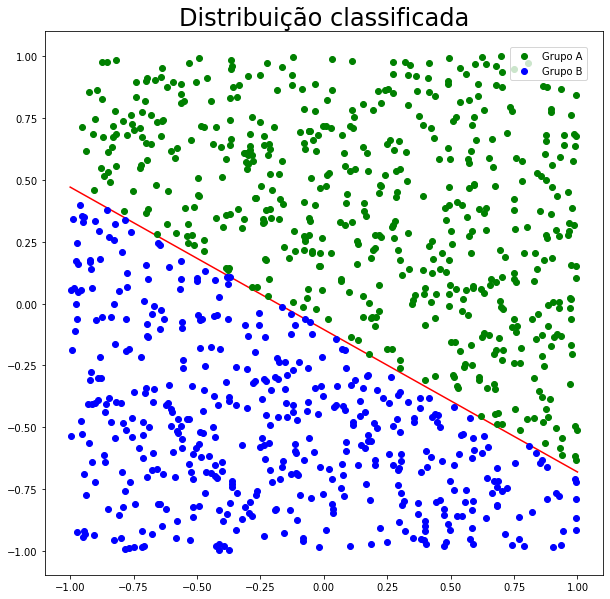

In [5]:
grupo_A, grupo_B, lista_classificacao = classificar_amostra(populacao,reta)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot([-1,1], [y0,y1], color= "red") # plotando a reta
ax.plot(grupo_A[0], grupo_A[1], "go", label = 'Grupo A') 
ax.plot(grupo_B[0], grupo_B[1], "bo", label = 'Grupo B') 
ax.legend(loc = 'upper right', bbox_to_anchor=(0.98,0.98))
plt.title('Distribuição classificada', fontsize=24)
plt.show()

### Prepara amostra para treinamento com n = 10

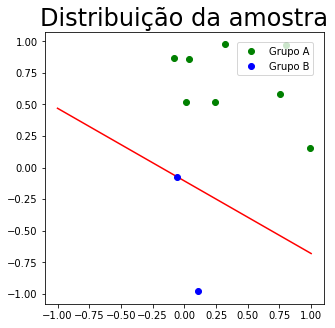

In [6]:
amostra, teste = selecionarAmostra(10, populacao)
reta = gerar_reta(amostra[0], y0, y1)

grupo_A, grupo_B, lista_classificacao = classificar_amostra(amostra,reta)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot([-1,1], [y0,y1], color= "red") # plotando a reta
ax.plot(grupo_A[0], grupo_A[1], "go", label = 'Grupo A') 
ax.plot(grupo_B[0], grupo_B[1], "bo", label = 'Grupo B') 
ax.legend(loc = 'upper right', bbox_to_anchor=(0.98,0.98))
plt.title('Distribuição da amostra', fontsize=24)
plt.show()

### Preparando e treinando amostra

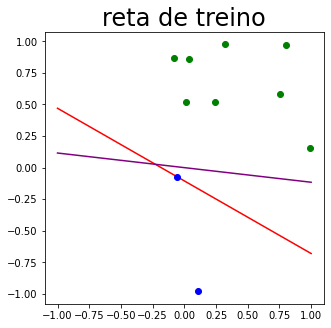

In [7]:
amostra = preparar_amostra_treino(amostra)

W = PLA(amostra, lista_classificacao)

# Pontos da reta Perceptron
y2 = -1*(-1*W[1]+W[0])/W[2]
y3 = -1*( 1*W[1]+W[0])/W[2]

fig, ax = plt.subplots(figsize=(5,5))
ax.plot([-1,1], [y0, y1], color= "red") # plotando a reta hipótese
ax.plot([-1,1], [y2, y3], color= "purple") # plotando a reta perceptron
ax.plot(grupo_A[0], grupo_A[1], "go", label = 'Grupo A') 
ax.plot(grupo_B[0], grupo_B[1], "bo", label = 'Grupo B') 
plt.title('reta de treino', fontsize=24)
plt.show()

### Testando Treinamento

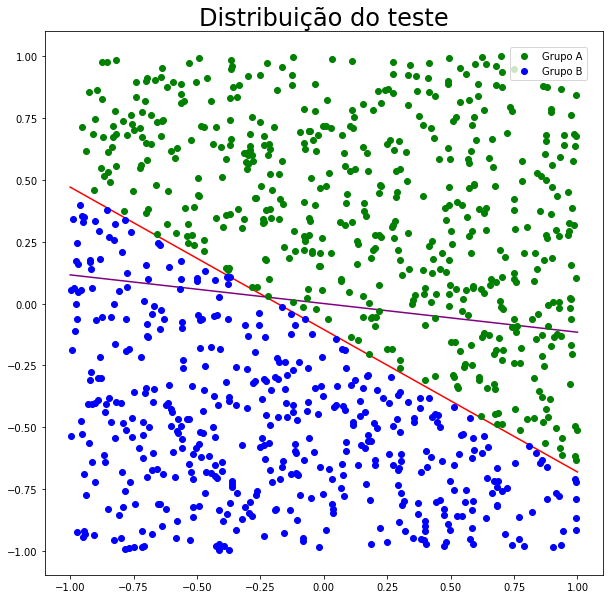

In [8]:
reta = gerar_reta(teste[0], y0, y1)
grupo_A, grupo_B, lista_classificacao = classificar_amostra(teste,reta)


fig, ax = plt.subplots(figsize=(10,10))
ax.plot([-1,1], [y0,y1], color= "red") # plotando a reta
ax.plot([-1,1], [y2, y3], color= "purple") # plotando a reta
ax.plot(grupo_A[0], grupo_A[1], "go", label = 'Grupo A') 
ax.plot(grupo_B[0], grupo_B[1], "bo", label = 'Grupo B') 
ax.legend(loc = 'upper right', bbox_to_anchor=(0.98,0.98))
plt.title('Distribuição do teste', fontsize=24)
plt.show()

In [9]:
teste = preparar_amostra_treino(teste)
n_erros = Teste(teste, W, lista_classificacao)
print(f"TAXA DE ERRO (N=10): {n_erros*100/len(teste):.2f}%")

TAXA DE ERRO (N=10): 12.42%


### Prepara amostra para treinamento com n = 100

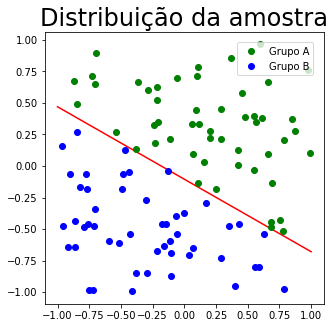

In [10]:
amostra, teste = selecionarAmostra(100, populacao)
reta = gerar_reta(amostra[0], y0, y1)

grupo_A, grupo_B, lista_classificacao = classificar_amostra(amostra,reta)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot([-1,1], [y0,y1], color= "red") # plotando a reta
ax.plot(grupo_A[0], grupo_A[1], "go", label = 'Grupo A') 
ax.plot(grupo_B[0], grupo_B[1], "bo", label = 'Grupo B') 
ax.legend(loc = 'upper right', bbox_to_anchor=(0.98,0.98))
plt.title('Distribuição da amostra', fontsize=24)
plt.show()

### Preparando e treinando amostra

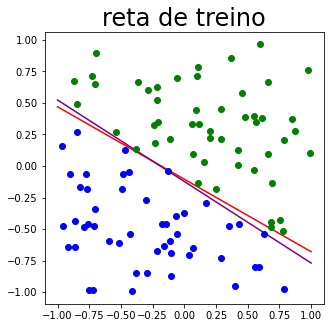

In [11]:
amostra = preparar_amostra_treino(amostra)

W = PLA(amostra, lista_classificacao)

# Pontos da reta Perceptron
y2 = -1*(-1*W[1]+W[0])/W[2]
y3 = -1*( 1*W[1]+W[0])/W[2]

fig, ax = plt.subplots(figsize=(5,5))
ax.plot([-1,1], [y0, y1], color= "red") # plotando a reta hipótese
ax.plot([-1,1], [y2, y3], color= "purple") # plotando a reta perceptron
ax.plot(grupo_A[0], grupo_A[1], "go", label = 'Grupo A') 
ax.plot(grupo_B[0], grupo_B[1], "bo", label = 'Grupo B') 
plt.title('reta de treino', fontsize=24)
plt.show()

### Testando Treinamento

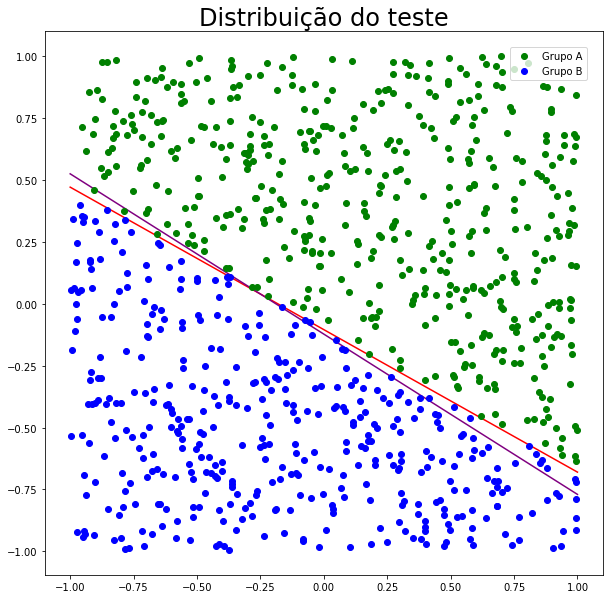

In [12]:
reta = gerar_reta(teste[0], y0, y1)
grupo_A, grupo_B, lista_classificacao = classificar_amostra(teste,reta)


fig, ax = plt.subplots(figsize=(10,10))
ax.plot([-1,1], [y0,y1], color= "red") # plotando a reta
ax.plot([-1,1], [y2, y3], color= "purple") # plotando a reta
ax.plot(grupo_A[0], grupo_A[1], "go", label = 'Grupo A') 
ax.plot(grupo_B[0], grupo_B[1], "bo", label = 'Grupo B') 
ax.legend(loc = 'upper right', bbox_to_anchor=(0.98,0.98))
plt.title('Distribuição do teste', fontsize=24)
plt.show()

In [13]:
teste = preparar_amostra_treino(teste)
n_erros = Teste(teste, W, lista_classificacao)
print(f"TAXA DE ERRO (N=100): {n_erros*100/len(teste):.2f}%")

TAXA DE ERRO (N=100): 1.89%
